In [2]:
## HABS-HD
keywords = {
    'demographic information': ["ĠDem","ographic","Ġinformation",":Ċ"],  # Sequence of tokens for baseline info   
    "genetic information":["ĠĊ", "ĠGenetic", "Ġinformation", ":Ċ"],
    "family history":["ĠĊ", "ĠFamily", "Ġhistory", ":Ċ"],
    'visit_info': ['Ġ', 'ĠThis', 'Ġvisit', 'Ġis'], 
    'vital':[":Ċ","ĠĊ","ĠV","itals",":Ċ"],
    'cognitive test':["ĠĊ","ĠCognitive","Ġtest",":Ċ"],
    'physical score':["ĠĊ","ĠPhysical","ĠMeasure","ĠScore"],
    'AD blood biomarker':["ĠĊ","ĠAD","Ġbiom","arker","Ġin","Ġblood",":Ċ"],
    'medication':["ĠĊ","ĠMedic","ation",":Ċ"],
    "volume":["ĠĊ", "ĠBrain", "ĠVolume", "Ġin", "ĠMRI", ":Ċ"],
    'thickness':["ĠĊ", "ĠBrain", "ĠThickness", "Ġin", "ĠMRI", ":Ċ"],
    "diagnosis":["ĠĊ", "ĠDiagnosis", ":Ċ","ĠDiagnosis",":"],
    "other health condition":["ĠĊ","ĠOther","Ġhealth","Ġcondition",":Ċ"],
    "response":[",","ĠĊĊ", "###","ĠResponse", ":Ċ","Ab", "eta"]
    
}


In [4]:
def match_sequence(data, start_index, pattern):
    for i, token in enumerate(pattern):
        if data.iloc[start_index + i]['token'] != token:
            return False
    return True

In [6]:
import os
import pandas as pd
data_directory="D:\\Research\\AD\\ADLLM\\ADNI process 9\\AD_attention_Dec_27\\AD_attention_Dec_27\\HABS-HD\\"
results=[]
for file_index in range(742):
    file_path = os.path.join(data_directory, f"sample_{file_index}.csv")
    
    # Load the data for each file
    data = pd.read_csv(file_path)

    # Initialize dictionary to store start tokens and averages for each group in the current file
    group_start_tokens = {group: None for group in keywords.keys()}
    group_average_scores = {group: 0 for group in keywords.keys()}

    # Scan through data to detect groups based on keywords
    for i in range(len(data)):
        for group, pattern in keywords.items():
            if i <= len(data) - len(pattern) and match_sequence(data, i, pattern):
                group_start_tokens[group] = i
                break

    # Sort groups based on their start values for correct interval formation
    filtered_groups = [(group, start) for group, start in group_start_tokens.items() if start is not None]
    sorted_groups = sorted(filtered_groups, key=lambda x: x[1])

    # Calculate intervals and average attention scores for each category
    for j, (group, start) in enumerate(sorted_groups):
        end = sorted_groups[j + 1][1] - 1 if j + 1 < len(sorted_groups) else data['Unnamed: 0'].max()
        interval_data = data[(data['Unnamed: 0'] >= start) & (data['Unnamed: 0'] <= end)]
        group_average_scores[group] = interval_data['attention'].mean() if not interval_data.empty else 0

    # Append results for the current file (person)
    group_average_scores['person_id'] = f"sample_{file_index}"
    results.append(group_average_scores)


D:\ANACONDA\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
D:\ANACONDA\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.2' currently installed).
  from pandas.core import (


In [7]:
df_results = pd.DataFrame(results)

# Save to CSV for later analysis
output_path = os.path.join(data_directory, "average_attention_scores_per_person.csv")
df_results.to_csv(output_path, index=False)

# Display the results DataFrame
print(df_results.head())


   demographic information  genetic information  family history  visit_info  \
0                 0.176939                  0.0               0    0.117474   
1                 0.166717                  0.0               0    0.121802   
2                 0.170378                  0.0               0    0.120451   
3                 0.176440                  0.0               0    0.110255   
4                 0.173163                  0.0               0    0.120093   

      vital  cognitive test  physical score  AD blood biomarker  medication  \
0  0.271895        0.111102             0.0            0.321205           0   
1  0.287305        0.106746             0.0            0.328553           0   
2  0.294200        0.111332             0.0            0.312897           0   
3  0.341860        0.116891             0.0            0.308563           0   
4  0.298185        0.108017             0.0            0.328868           0   

     volume  thickness  diagnosis  other health co

D:\ANACONDA\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
D:\ANACONDA\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.2' currently installed).
  from pandas.core import (


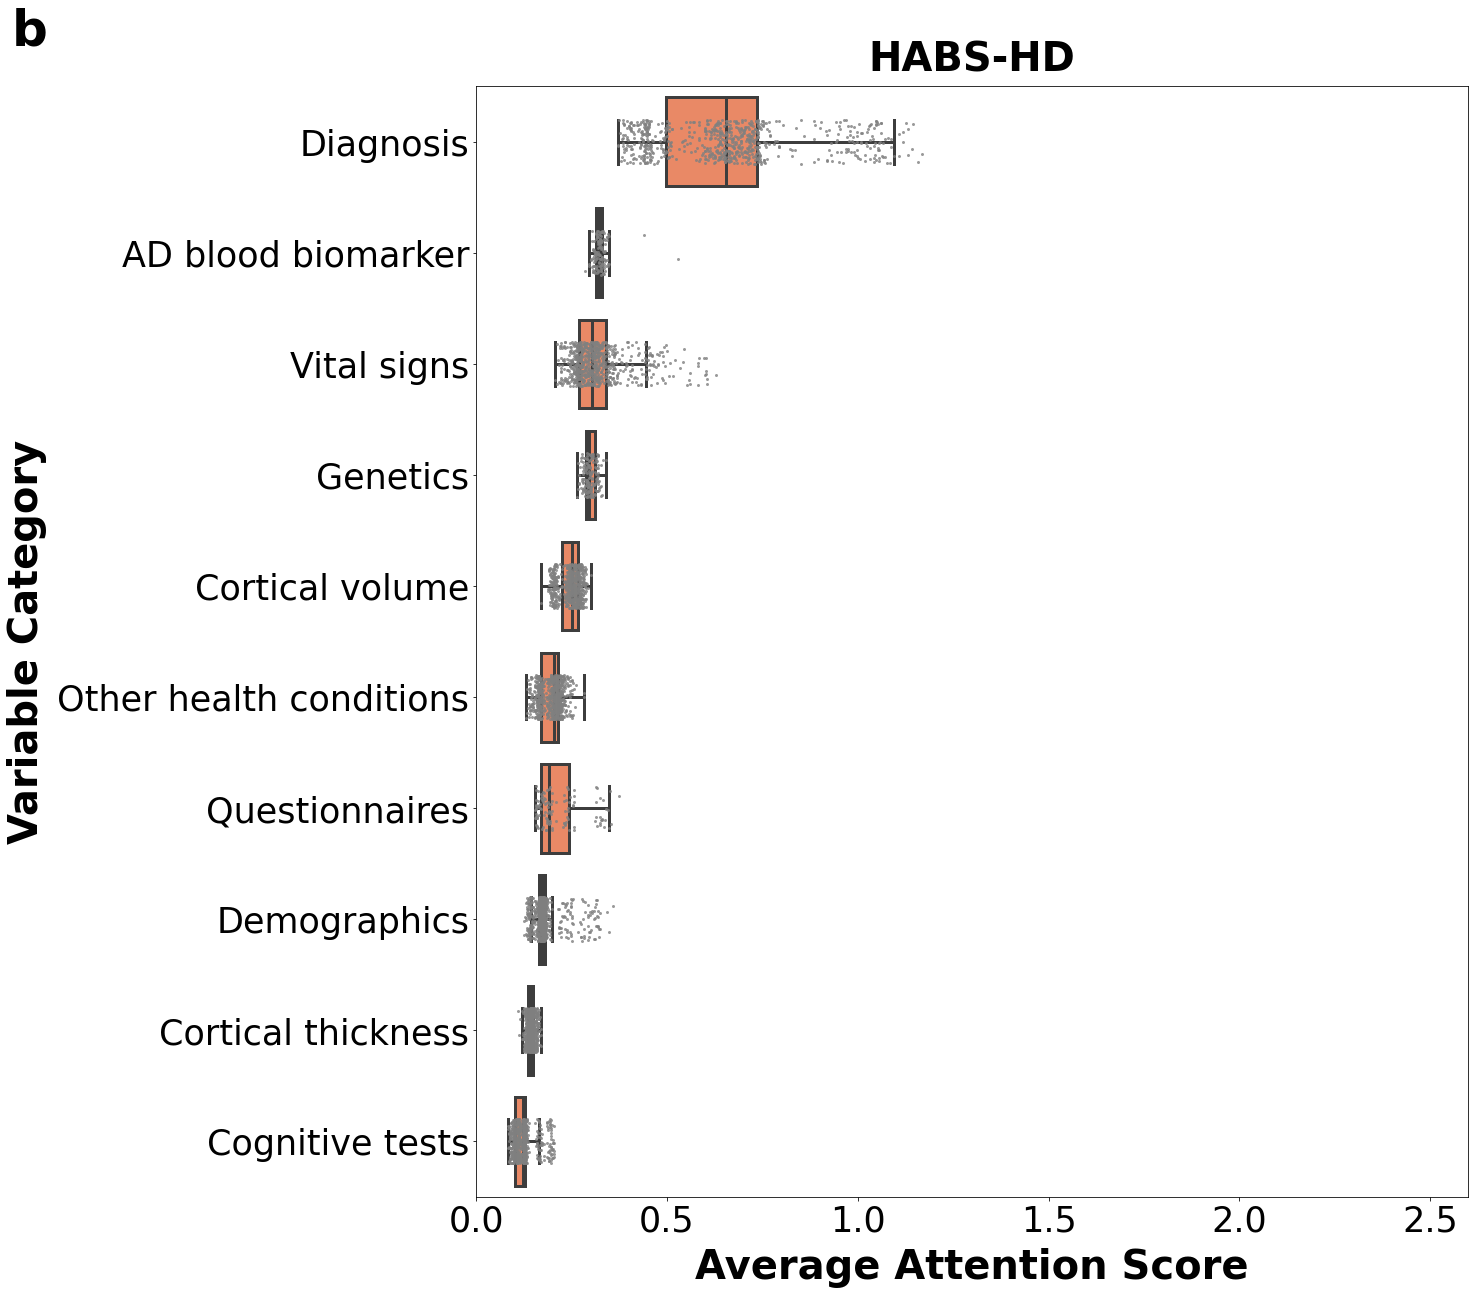

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
data_directory="D:\\Research\\AD\\ADLLM\\ADNI process 9\\AD_attention_Dec_27\\AD_attention_Dec_27\\HABS-HD\\"
data = pd.read_csv(data_directory + 'average_attention_scores_per_person.csv')

# Rename columns
data = data.rename(columns={
    'vital': 'Vital signs'
})
data = data.rename(columns={col: col.capitalize() for col in data.columns})

# Drop unnecessary columns
data = data.drop(columns=['Response', 'Visit_info',"Person_id","Family history","Medication"])
data = data.rename(columns={
    'Ad blood biomarker': 'AD blood biomarker',
    "Volume":"Cortical volume",
    "Thickness":"Cortical thickness",
    "Demographic information":"Demographics",
    "Other health condition":"Other health conditions",
    "Genetic information":"Genetics",
    "Physical score":"Questionnaires",
    "Cognitive test":"Cognitive tests"
})
# Remove zero values
data_no_zeros = data.replace(0, np.nan)

# Calculate medians for each category, sort them, and reorder the data columns
medians = data_no_zeros.median().sort_values(ascending=False)
data_sorted = data_no_zeros[medians.index]

# Set the plot style and color scheme
#sns.set(style="whitegrid")
plt.figure(figsize=(22, 18))

# Define the green color
box_color = "#FF7F50"   # Approximated green color
point_color = "grey"  # Darker shade of green for points

# Create the box plot with a single color and sorted categories
ax = sns.boxplot(data=data_sorted, orient='h', color=box_color, fliersize=0, linewidth=3)

# Add points with a slightly darker green color, smaller size, and increased transparency
sns.stripplot(data=data_sorted, orient='h', color=point_color, size=3, jitter=0.2, alpha=0.8)

# Customize labels and title
plt.xlabel('Average Attention Score', fontsize=40,labelpad=10,fontweight='bold')
plt.ylabel('Variable Category', fontsize=40,labelpad=10,fontweight='bold')
plt.title('HABS-HD', fontsize=40, fontweight='bold', pad=15)
plt.text(-0.45, 1.05, 'b', transform=plt.gca().transAxes, fontsize=50, fontweight='bold', color="black", ha='center', va='center')
# Adjust tick label size for readability
plt.xticks(fontsize=35)
plt.yticks(fontsize=35)
plt.xlim(0, 2.6)
plt.tight_layout()
plt.savefig("D:\\Research\\AD\\ADLLM\\ADNI process 9\\Result_visualization\\attention_habs-hd.svg", format="svg")
plt.savefig("D:\\Research\\AD\\ADLLM\\ADNI process 9\\Result_visualization\\attention_habs-hd.png", format="png")
# Show the plot
plt.show()


In [15]:
### A4

keywords = {
    'demographic information': ["ĠDem","ographic","Ġinformation",":Ċ"],   # Sequence of tokens for baseline info   
    "Genetic information":["ĠĊ", "ĠGenetic", "Ġinformation", ":Ċ"],
    "family history":["ĠĊ", "ĠFamily", "Ġhistory", ":Ċ"],
    'visit_info': ['ĠThis', 'Ġvisit', 'Ġis'], 
    'vital':[":Ċ","ĠĊ","ĠV","itals",":Ċ"],
    'cognitive test':["ĠĊ","ĠCognitive","Ġtest",":Ċ"],
    "habit":["ĠĊ","ĠHab","its",":Ċ"],
    'physical score':["ĠĊ","ĠPhysical","Ġand","ĠNeuro","logical","Ġtest",":","ĠĊ"],
     'AD blood biomarker':["ĠĊ","ĠAD","Ġbiom","arker","Ġin","Ġblood",":Ċ"],
    'medication':["ĠĊ","ĠMedic","ation",":Ċ"],
    "volume":["ĠĊ", "ĠBrain", "ĠVolume", "Ġin", "ĠMRI", ":Ċ"],
    'thickness':["ĠĊ", "ĠBrain", "ĠThickness", "Ġin", "ĠMRI", ":Ċ"],
    "diagnosis":["ĠĊ", "ĠDiagnosis", ":Ċ","ĠDiagnosis",":"],
    "other health condition":["ĠĊ","ĠOther","Ġhealth","Ġcondition",":Ċ"],
    "response":[",","ĠĊĊ", "###","ĠResponse", ":Ċ","Ab", "eta"]
    
}



In [16]:
data_directory="D:\\Research\\AD\\ADLLM\\ADNI process 9\\AD_attention_Dec_27\\AD_attention_Dec_27\\A4\\"
results=[]
for file_index in range(440):
    file_path = os.path.join(data_directory, f"sample_{file_index}.csv")
    
    # Load the data for each file
    data = pd.read_csv(file_path)

    # Initialize dictionary to store start tokens and averages for each group in the current file
    group_start_tokens = {group: None for group in keywords.keys()}
    group_average_scores = {group: 0 for group in keywords.keys()}

    # Scan through data to detect groups based on keywords
    for i in range(len(data)):
        for group, pattern in keywords.items():
            if i <= len(data) - len(pattern) and match_sequence(data, i, pattern):
                group_start_tokens[group] = i
                break

    # Sort groups based on their start values for correct interval formation
    filtered_groups = [(group, start) for group, start in group_start_tokens.items() if start is not None]
    sorted_groups = sorted(filtered_groups, key=lambda x: x[1])

    # Calculate intervals and average attention scores for each category
    for j, (group, start) in enumerate(sorted_groups):
        end = sorted_groups[j + 1][1] - 1 if j + 1 < len(sorted_groups) else data['Unnamed: 0'].max()
        interval_data = data[(data['Unnamed: 0'] >= start) & (data['Unnamed: 0'] <= end)]
        group_average_scores[group] = interval_data['attention'].mean() if not interval_data.empty else 0

    # Append results for the current file (person)
    group_average_scores['person_id'] = f"sample_{file_index}"
    results.append(group_average_scores)


In [17]:
df_results = pd.DataFrame(results)

# Save to CSV for later analysis
output_path = os.path.join(data_directory, "average_attention_scores_per_person.csv")
df_results.to_csv(output_path, index=False)

# Display the results DataFrame
print(df_results.head())

   demographic information  Genetic information  family history  visit_info  \
0                 0.151067             0.377703        0.138208    0.097193   
1                 0.145332             0.351542        0.138301    0.089661   
2                 0.155692             0.400912        0.137347    0.094973   
3                 0.153407             0.381894        0.140037    0.103724   
4                 0.133406             0.335829        0.123690    0.088185   

      vital  cognitive test     habit  physical score  AD blood biomarker  \
0  0.119960        0.128788  0.074124        0.082371                   0   
1  0.131039        0.149378  0.066867        0.082018                   0   
2  0.121455        0.119330  0.074494        0.084985                   0   
3  0.117340        0.135594  0.070482        0.079992                   0   
4  0.122205        0.146866  0.068214        0.078982                   0   

   medication    volume  thickness  diagnosis  other health co

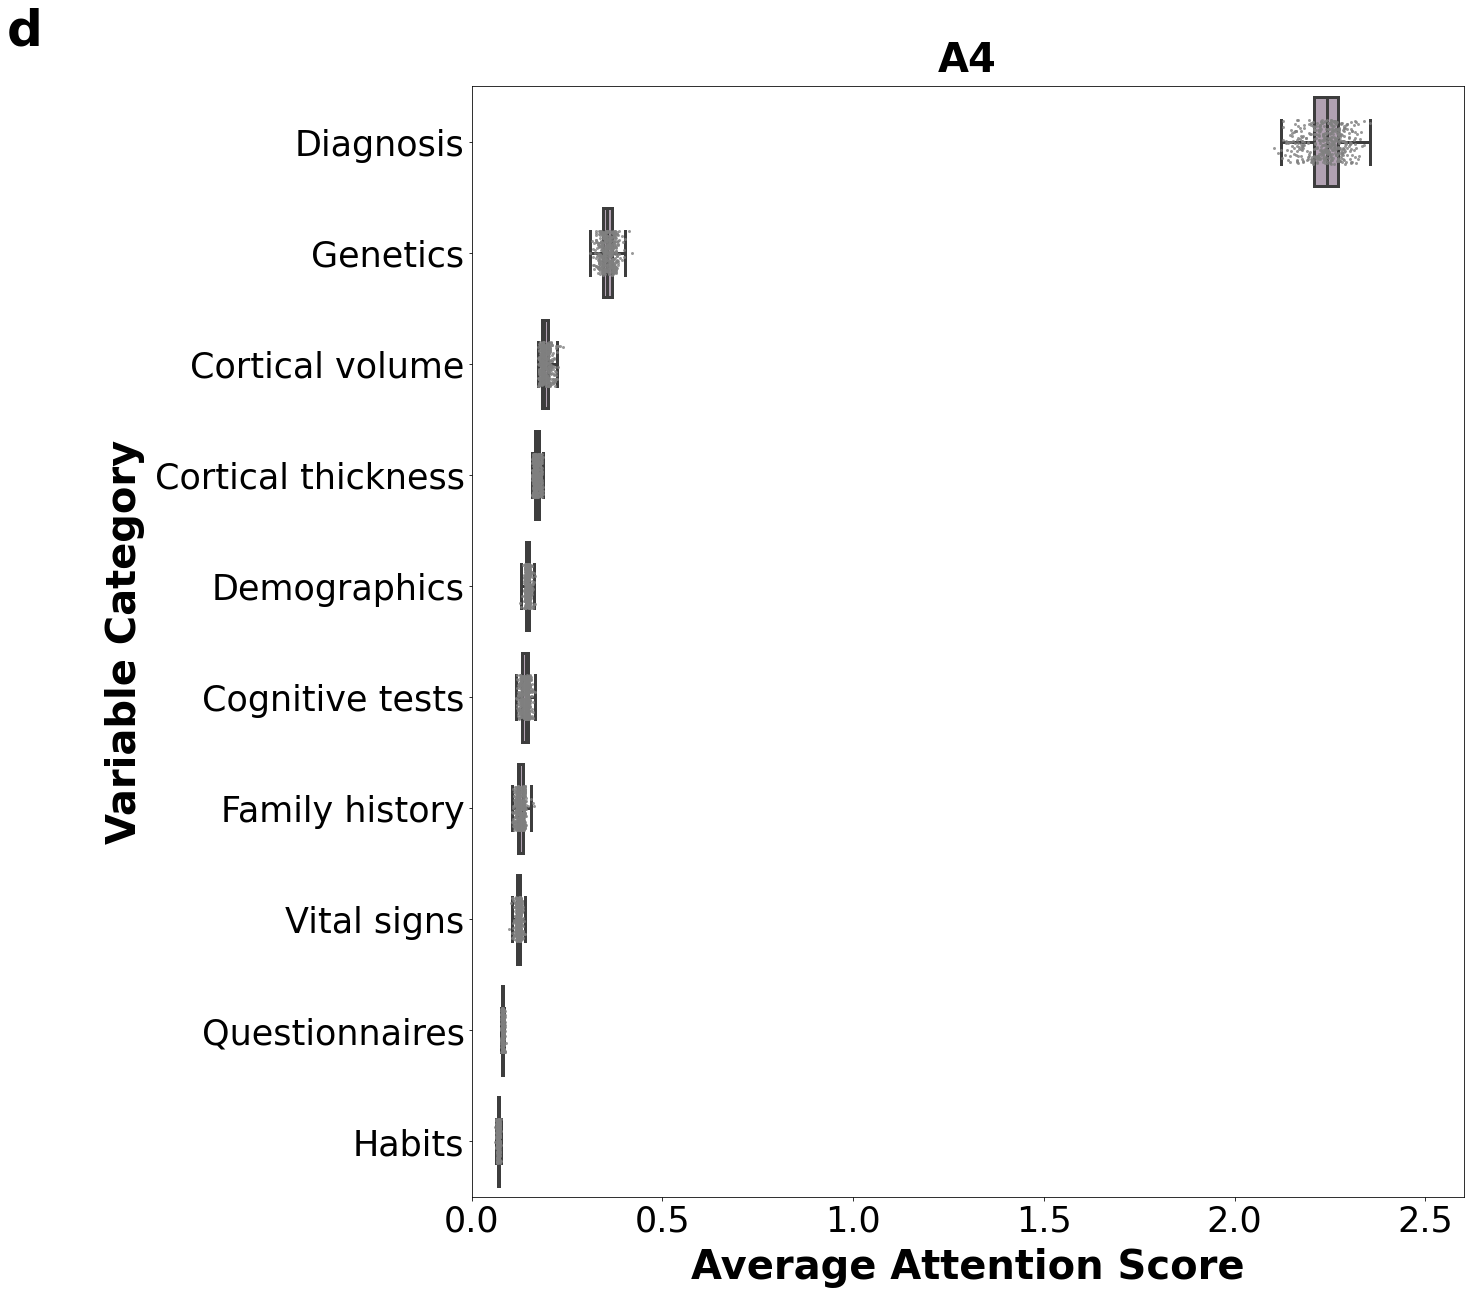

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
data_directory="D:\\Research\\AD\\ADLLM\\ADNI process 9\\AD_attention_Dec_27\\AD_attention_Dec_27\\A4\\"
# Load the data
data = pd.read_csv(data_directory + 'average_attention_scores_per_person.csv')

# Rename columns
data = data.rename(columns={
    "volume":"Cortical volume",
    "thickness":"Cortical thickness",
    "vital":"Vital signs",
    "demographic information":"Demographics",
    "Genetic information":"Genetics",
    "physical score":"Questionnaires",
    "cognitive test":"Cognitive tests",
    "habit":"Habits"
})
data = data.rename(columns={col: col.capitalize() for col in data.columns})

# Drop unnecessary columns
data = data.drop(columns=['Response', 'Visit_info',"Person_id","Medication","Ad blood biomarker","Other health condition"])

# Remove zero values
data_no_zeros = data.replace(0, np.nan)

# Calculate medians for each category, sort them, and reorder the data columns
medians = data_no_zeros.median().sort_values(ascending=False)
data_sorted = data_no_zeros[medians.index]

# Set the plot style and color scheme
#sns.set(style="whitegrid")
plt.figure(figsize=(22, 18))

# Define the green color
box_color = "#B39EB5"   # Approximated green color
point_color = "grey"  # Darker shade of green for points

# Create the box plot with a single color and sorted categories
ax = sns.boxplot(data=data_sorted, orient='h', color=box_color, fliersize=0, linewidth=3)

# Add points with a slightly darker green color, smaller size, and increased transparency
sns.stripplot(data=data_sorted, orient='h', color=point_color, size=3, jitter=0.2, alpha=0.8)

# Customize labels and title
plt.xlabel('Average Attention Score', fontsize=40, labelpad=10,fontweight='bold')
plt.ylabel('Variable Category', fontsize=40, labelpad=10,fontweight='bold')
plt.title('A4', fontsize=40, fontweight='bold', pad=15)
plt.text(-0.45, 1.05, 'd', transform=plt.gca().transAxes, fontsize=50, fontweight='bold', color="black", ha='center', va='center')
# Adjust tick label size for readability

plt.xticks(fontsize=35)
plt.yticks(fontsize=35)
plt.xlim(0, 2.6)
plt.tight_layout()

plt.savefig("D:\\Research\\AD\\ADLLM\\ADNI process 9\\Result_visualization\\attention_A4.svg", format="svg")
plt.savefig("D:\\Research\\AD\\ADLLM\\ADNI process 9\\Result_visualization\\attention_A4.png", format="png")
# Show the plot
plt.show()


In [35]:
### ADNI
keywords = {
    'demographic information': ["ĠDem","ographic","Ġinformation",":Ċ"],    # Sequence of tokens for baseline info   
    "Genetics":["ĠĊ", "ĠGenetic", "Ġinformation", ":Ċ"],
    "family history":["ĠĊ", "ĠFamily", "Ġhistory", ":Ċ"],
    'visit_info': ['Ġ', 'ĠThis', 'Ġvisit', 'Ġis'], 
    'vital':[":Ċ","ĠĊ","ĠV","itals",":Ċ"],
    'cognitive test':["ĠĊ","ĠCognitive","Ġtest",":Ċ"],
    "habit":["ĠĊ","ĠHab","its",":Ċ"],
    'physical score':["ĠĊ","ĠPhysical","ĠMeasure","ĠScore"],
    'AD blood biomarker':["ĠĊ","ĠAD","Ġbiom","arker","Ġin","Ġblood",":Ċ"],
    'medication':["ĠĊ","ĠMedic","ation",":Ċ"],
    "volume":["ĠĊ", "ĠBrain", "ĠVolume", "Ġin", "ĠMRI", ":Ċ"],
    'thickness':["ĠĊ", "ĠBrain", "ĠThickness", "Ġin", "ĠMRI", ":Ċ"],
     "diagnosis":["ĠĊ", "ĠDiagnosis", ":Ċ","ĠDiagnosis",":"],
    "other health condition":["ĠĊ","ĠOther","Ġhealth","Ġcondition",":Ċ"],
    "response":[",","ĠĊĊ", "###","ĠResponse", ":Ċ","Ab", "eta"],
    'AD CSF biomarker':["ĠĊ","ĠAD","Ġbiom","arker","Ġin","ĠC","ere","bro","sp","inal","ĠFluid",":Ċ"],
    "FDG-PET":["ĠĊ","ĠFlu","or","ode","oxy","gl","ucose","ĠPET","Ġimage",":Ċ"]
}



In [37]:
data_directory="D:\\Research\\AD\\ADLLM\\ADNI process 9\\AD_attention_Dec_27\\AD_attention_Dec_27\\ADNI\\"
results=[]
for file_index in range(2464):
    file_path = os.path.join(data_directory, f"sample_{file_index}.csv")
    
    # Try to load the data; if the file doesn't exist, skip it
    try:
        data = pd.read_csv(file_path)
    except FileNotFoundError:
        print(f"File {file_path} not found, skipping.")
        continue

    # Initialize dictionary to store start tokens and averages for each group in the current file
    group_start_tokens = {group: None for group in keywords.keys()}
    group_average_scores = {group: 0 for group in keywords.keys()}

    # Scan through data to detect groups based on keywords
    for i in range(len(data)):
        for group, pattern in keywords.items():
            if i <= len(data) - len(pattern) and match_sequence(data, i, pattern):
                group_start_tokens[group] = i
                break

    # Sort groups based on their start values for correct interval formation
    filtered_groups = [(group, start) for group, start in group_start_tokens.items() if start is not None]
    sorted_groups = sorted(filtered_groups, key=lambda x: x[1])

    # Calculate intervals and average attention scores for each category
    for j, (group, start) in enumerate(sorted_groups):
        end = sorted_groups[j + 1][1] - 1 if j + 1 < len(sorted_groups) else data['Unnamed: 0'].max()
        interval_data = data[(data['Unnamed: 0'] >= start) & (data['Unnamed: 0'] <= end)]
        group_average_scores[group] = interval_data['attention'].mean() if not interval_data.empty else 0

    # Append results for the current file (person)
    group_average_scores['person_id'] = f"sample_{file_index}"
    results.append(group_average_scores)


File D:\Research\AD\ADLLM\ADNI process 9\AD_attention_Dec_27\AD_attention_Dec_27\ADNI\sample_51.csv not found, skipping.
File D:\Research\AD\ADLLM\ADNI process 9\AD_attention_Dec_27\AD_attention_Dec_27\ADNI\sample_52.csv not found, skipping.
File D:\Research\AD\ADLLM\ADNI process 9\AD_attention_Dec_27\AD_attention_Dec_27\ADNI\sample_53.csv not found, skipping.
File D:\Research\AD\ADLLM\ADNI process 9\AD_attention_Dec_27\AD_attention_Dec_27\ADNI\sample_99.csv not found, skipping.
File D:\Research\AD\ADLLM\ADNI process 9\AD_attention_Dec_27\AD_attention_Dec_27\ADNI\sample_100.csv not found, skipping.
File D:\Research\AD\ADLLM\ADNI process 9\AD_attention_Dec_27\AD_attention_Dec_27\ADNI\sample_130.csv not found, skipping.
File D:\Research\AD\ADLLM\ADNI process 9\AD_attention_Dec_27\AD_attention_Dec_27\ADNI\sample_131.csv not found, skipping.
File D:\Research\AD\ADLLM\ADNI process 9\AD_attention_Dec_27\AD_attention_Dec_27\ADNI\sample_159.csv not found, skipping.
File D:\Research\AD\ADLLM\AD

File D:\Research\AD\ADLLM\ADNI process 9\AD_attention_Dec_27\AD_attention_Dec_27\ADNI\sample_905.csv not found, skipping.
File D:\Research\AD\ADLLM\ADNI process 9\AD_attention_Dec_27\AD_attention_Dec_27\ADNI\sample_906.csv not found, skipping.
File D:\Research\AD\ADLLM\ADNI process 9\AD_attention_Dec_27\AD_attention_Dec_27\ADNI\sample_907.csv not found, skipping.
File D:\Research\AD\ADLLM\ADNI process 9\AD_attention_Dec_27\AD_attention_Dec_27\ADNI\sample_908.csv not found, skipping.
File D:\Research\AD\ADLLM\ADNI process 9\AD_attention_Dec_27\AD_attention_Dec_27\ADNI\sample_909.csv not found, skipping.
File D:\Research\AD\ADLLM\ADNI process 9\AD_attention_Dec_27\AD_attention_Dec_27\ADNI\sample_910.csv not found, skipping.
File D:\Research\AD\ADLLM\ADNI process 9\AD_attention_Dec_27\AD_attention_Dec_27\ADNI\sample_911.csv not found, skipping.
File D:\Research\AD\ADLLM\ADNI process 9\AD_attention_Dec_27\AD_attention_Dec_27\ADNI\sample_912.csv not found, skipping.
File D:\Research\AD\ADLL

File D:\Research\AD\ADLLM\ADNI process 9\AD_attention_Dec_27\AD_attention_Dec_27\ADNI\sample_1220.csv not found, skipping.
File D:\Research\AD\ADLLM\ADNI process 9\AD_attention_Dec_27\AD_attention_Dec_27\ADNI\sample_1221.csv not found, skipping.
File D:\Research\AD\ADLLM\ADNI process 9\AD_attention_Dec_27\AD_attention_Dec_27\ADNI\sample_1222.csv not found, skipping.
File D:\Research\AD\ADLLM\ADNI process 9\AD_attention_Dec_27\AD_attention_Dec_27\ADNI\sample_1223.csv not found, skipping.
File D:\Research\AD\ADLLM\ADNI process 9\AD_attention_Dec_27\AD_attention_Dec_27\ADNI\sample_1224.csv not found, skipping.
File D:\Research\AD\ADLLM\ADNI process 9\AD_attention_Dec_27\AD_attention_Dec_27\ADNI\sample_1236.csv not found, skipping.
File D:\Research\AD\ADLLM\ADNI process 9\AD_attention_Dec_27\AD_attention_Dec_27\ADNI\sample_1237.csv not found, skipping.
File D:\Research\AD\ADLLM\ADNI process 9\AD_attention_Dec_27\AD_attention_Dec_27\ADNI\sample_1238.csv not found, skipping.
File D:\Research

File D:\Research\AD\ADLLM\ADNI process 9\AD_attention_Dec_27\AD_attention_Dec_27\ADNI\sample_1538.csv not found, skipping.
File D:\Research\AD\ADLLM\ADNI process 9\AD_attention_Dec_27\AD_attention_Dec_27\ADNI\sample_1539.csv not found, skipping.
File D:\Research\AD\ADLLM\ADNI process 9\AD_attention_Dec_27\AD_attention_Dec_27\ADNI\sample_1547.csv not found, skipping.
File D:\Research\AD\ADLLM\ADNI process 9\AD_attention_Dec_27\AD_attention_Dec_27\ADNI\sample_1548.csv not found, skipping.
File D:\Research\AD\ADLLM\ADNI process 9\AD_attention_Dec_27\AD_attention_Dec_27\ADNI\sample_1549.csv not found, skipping.
File D:\Research\AD\ADLLM\ADNI process 9\AD_attention_Dec_27\AD_attention_Dec_27\ADNI\sample_1588.csv not found, skipping.
File D:\Research\AD\ADLLM\ADNI process 9\AD_attention_Dec_27\AD_attention_Dec_27\ADNI\sample_1589.csv not found, skipping.
File D:\Research\AD\ADLLM\ADNI process 9\AD_attention_Dec_27\AD_attention_Dec_27\ADNI\sample_1625.csv not found, skipping.
File D:\Research

In [38]:
df_results = pd.DataFrame(results)

# Save to CSV for later analysis
output_path = os.path.join(data_directory, "average_attention_scores_per_person.csv")
df_results.to_csv(output_path, index=False)

# Display the results DataFrame
print(df_results.head())


   demographic information  Genetics  family history  visit_info     vital  \
0                 0.138429  0.268099             0.0    0.154349  0.138991   
1                 0.133328  0.229033             0.0    0.144712  0.110729   
2                 0.123016  0.195253             0.0    0.140932  0.086483   
3                 0.094266  0.186968             0.0    0.128539  0.086781   
4                 0.089038  0.202085             0.0    0.135481  0.071663   

   cognitive test  habit  physical score  AD blood biomarker  medication  \
0        0.101555      0               0                   0         0.0   
1        0.092122      0               0                   0         0.0   
2        0.086730      0               0                   0         0.0   
3        0.070655      0               0                   0         0.0   
4        0.060434      0               0                   0         0.0   

     volume  thickness  diagnosis  other health condition   response  \
0 

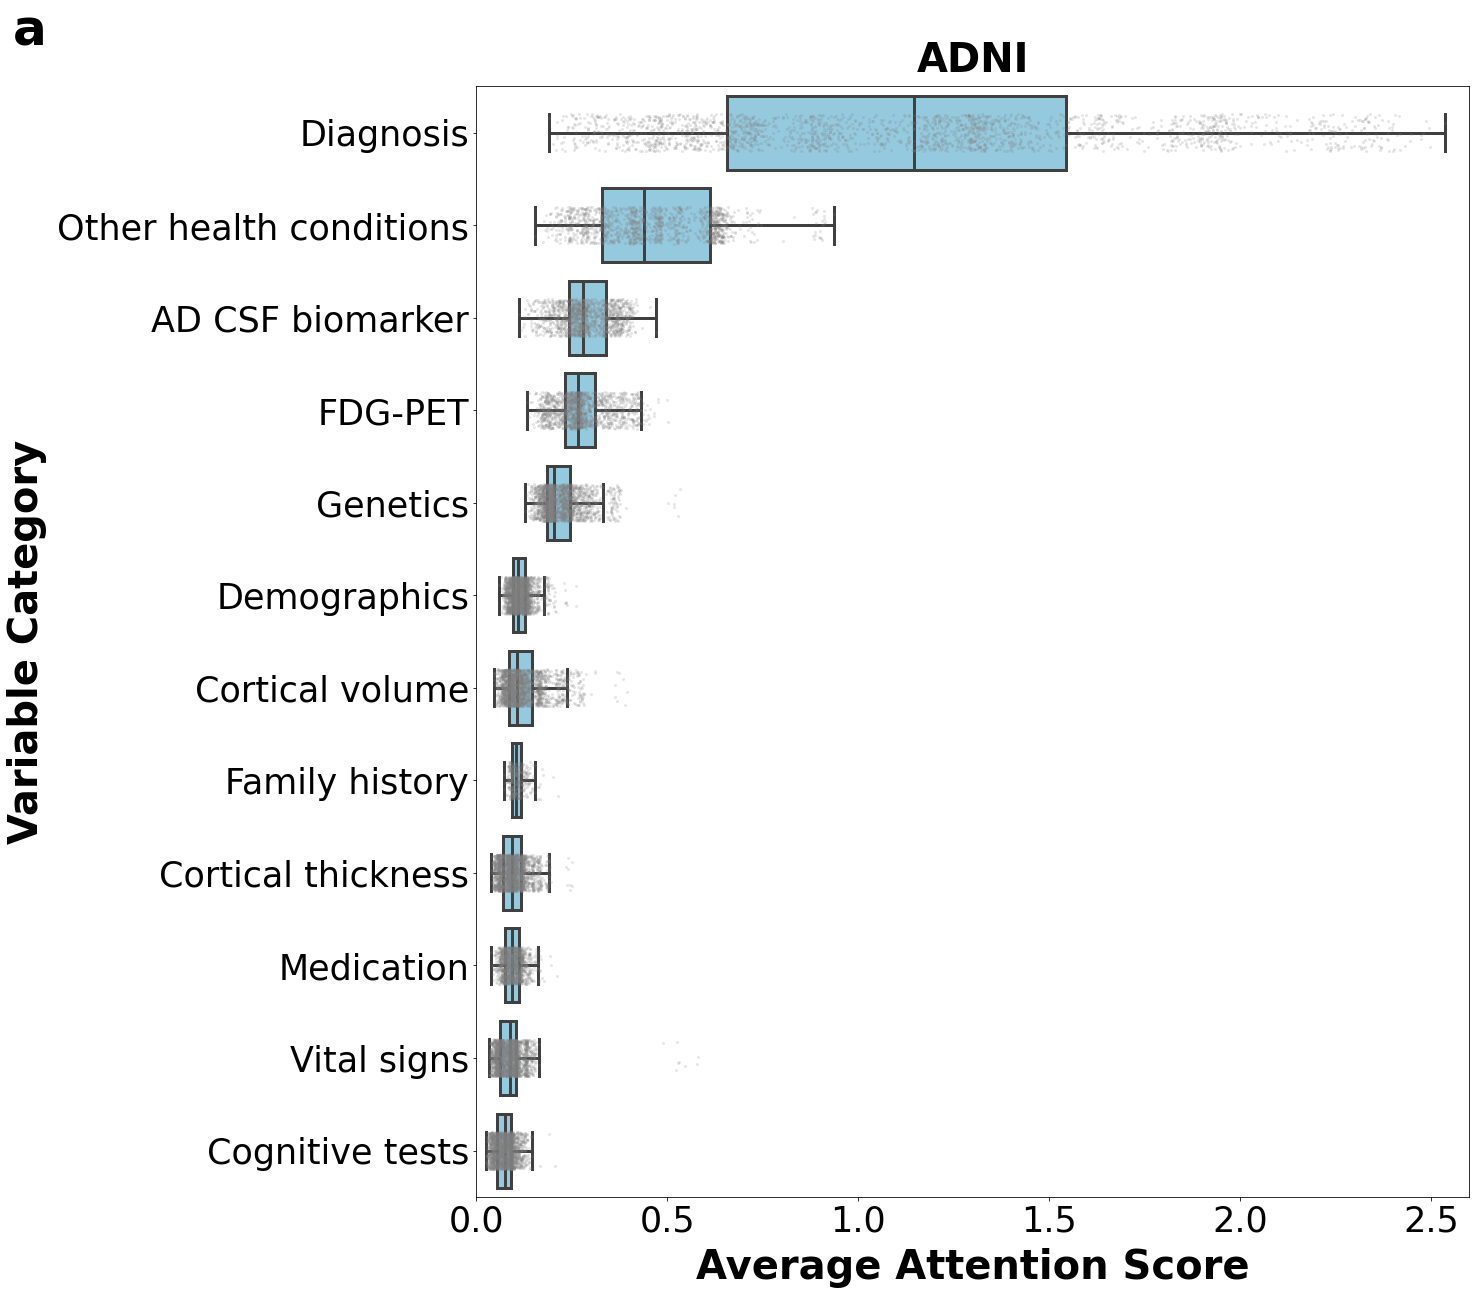

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
data_directory="D:\\Research\\AD\\ADLLM\\ADNI process 9\\AD_attention_Dec_27\\AD_attention_Dec_27\\ADNI\\"
# Load the data
data = pd.read_csv(data_directory + 'average_attention_scores_per_person.csv')

# Rename columns
data = data.rename(columns={
    'vital': 'Vital signs'
})
data = data.rename(columns={col: col.capitalize() for col in data.columns})
data = data.rename(columns={
    'Fdg-pet': 'FDG-PET',
    "Ad csf biomarker":"AD CSF biomarker",
    "Demographic information":"Demographics",
    "Volume":"Cortical volume",
    "Thickness":"Cortical thickness",
    "Other health condition":"Other health conditions",
    "Genetics":"Genetics",
    #"Physical score":"Questionnaires",
    "Cognitive test":"Cognitive tests"
})
# Drop unnecessary columns
data = data.drop(columns=['Response', 'Visit_info',"Person_id","Habit","Ad blood biomarker","Physical score"])

# Remove zero values
data_no_zeros = data.replace(0, np.nan)

# Calculate medians for each category, sort them, and reorder the data columns
medians = data_no_zeros.median().sort_values(ascending=False)
data_sorted = data_no_zeros[medians.index]

# Set the plot style and color scheme
#sns.set(style="whitegrid")
plt.figure(figsize=(22, 18))

# Define the green color
box_color = "#87CEEB"   # Approximated green color
point_color = "grey"  # Darker shade of green for points

# Create the box plot with a single color and sorted categories
ax = sns.boxplot(data=data_sorted, orient='h', color=box_color, fliersize=0, linewidth=3)

# Add points with a slightly darker green color, smaller size, and increased transparency
sns.stripplot(data=data_sorted, orient='h', color=point_color, size=3, jitter=0.2, alpha=0.2)

# Customize labels and title
plt.xlabel('Average Attention Score', fontsize=40, labelpad=10,fontweight='bold')
plt.ylabel('Variable Category', fontsize=40, labelpad=10,fontweight='bold')
plt.title('ADNI', fontsize=40, fontweight='bold', pad=15)
plt.text(-0.45, 1.05, 'a', transform=plt.gca().transAxes, fontsize=50, fontweight='bold', color="black", ha='center', va='center')
# Adjust tick label size for readability
plt.xticks(fontsize=35)
plt.yticks(fontsize=35)
plt.xlim(0, 2.6)
plt.tight_layout()
plt.savefig("D:\\Research\\AD\\ADLLM\\ADNI process 9\\Result_visualization\\attention_adni.svg", format="svg")
plt.savefig("D:\\Research\\AD\\ADLLM\\ADNI process 9\\Result_visualization\\attention_adni.png", format="png")
# Show the plot
plt.show()


In [51]:
### POINTER
keywords = {
    'demographic information': ["ĠDem","ographic","Ġinformation",":Ċ"],    # Sequence of tokens for baseline info   
    "Genetics":["ĠĊ", "ĠGenetic", "Ġinformation", ":Ċ"],
    "family history":["ĠĊ", "ĠFamily", "Ġhistory", ":Ċ"],
    'visit_info': ['Ġ', 'ĠThis', 'Ġvisit', 'Ġis'], 
    'vital':[":Ċ","ĠĊ","ĠV","itals",":Ċ"],
    'cognitive test':["ĠĊ","ĠCognitive","Ġtest",":Ċ"],
    "habit":["ĠĊ","ĠHab","its",":Ċ"],
    'physical score':["ĠĊ","ĠPhysical","ĠMeasure","ĠScore"],
    'AD blood biomarker':["ĠĊ","ĠAD","Ġbiom","arker","Ġin","Ġblood",":Ċ"],
    'medication':["ĠĊ","ĠMedic","ation",":Ċ"],
    "volume":["ĠĊ", "ĠBrain", "ĠVolume", "Ġin", "ĠMRI", ":Ċ"],
    'thickness':["ĠĊ", "ĠBrain", "ĠThickness", "Ġin", "ĠMRI", ":Ċ"],
     "diagnosis":["ĠĊ", "ĠDiagnosis", ":Ċ","ĠDiagnosis",":"],
    "other health condition":["ĠĊ","ĠOther","Ġhealth","Ġcondition",":Ċ"],
    "response":[",","ĠĊĊ", "###","ĠResponse", ":Ċ","Ab", "eta"],
    'AD CSF biomarker':["ĠĊ","ĠAD","Ġbiom","arker","Ġin","ĠC","ere","bro","sp","inal","ĠFluid",":Ċ"],
    "FDG-PET":["ĠĊ","ĠFlu","or","ode","oxy","gl","ucose","ĠPET","Ġimage",":Ċ"]
}



In [52]:
data_directory="D:\\Research\\AD\\ADLLM\\ADNI process 9\\AD_attention_Dec_27\\AD_attention_Dec_27\\POINTER\\"
results=[]
for file_index in range(188):
    file_path = os.path.join(data_directory, f"sample_{file_index}.csv")
    
    # Try to load the data; if the file doesn't exist, skip it
    try:
        data = pd.read_csv(file_path)
    except FileNotFoundError:
        print(f"File {file_path} not found, skipping.")
        continue

    # Initialize dictionary to store start tokens and averages for each group in the current file
    group_start_tokens = {group: None for group in keywords.keys()}
    group_average_scores = {group: 0 for group in keywords.keys()}

    # Scan through data to detect groups based on keywords
    for i in range(len(data)):
        for group, pattern in keywords.items():
            if i <= len(data) - len(pattern) and match_sequence(data, i, pattern):
                group_start_tokens[group] = i
                break

    # Sort groups based on their start values for correct interval formation
    filtered_groups = [(group, start) for group, start in group_start_tokens.items() if start is not None]
    sorted_groups = sorted(filtered_groups, key=lambda x: x[1])

    # Calculate intervals and average attention scores for each category
    for j, (group, start) in enumerate(sorted_groups):
        end = sorted_groups[j + 1][1] - 1 if j + 1 < len(sorted_groups) else data['Unnamed: 0'].max()
        interval_data = data[(data['Unnamed: 0'] >= start) & (data['Unnamed: 0'] <= end)]
        group_average_scores[group] = interval_data['attention'].mean() if not interval_data.empty else 0

    # Append results for the current file (person)
    group_average_scores['person_id'] = f"sample_{file_index}"
    results.append(group_average_scores)


In [53]:
df_results = pd.DataFrame(results)

# Save to CSV for later analysis
output_path = os.path.join(data_directory, "average_attention_scores_per_person.csv")
df_results.to_csv(output_path, index=False)

# Display the results DataFrame
print(df_results.head())


   demographic information  Genetics  family history  visit_info     vital  \
0                 0.105110  0.264393        0.113008    0.097626  0.127214   
1                 0.096973  0.272464        0.110263    0.101876  0.123920   
2                 0.103496  0.299457        0.114709    0.101201  0.130821   
3                 0.102061  0.267891        0.110389    0.095985  0.124943   
4                 0.114199  0.283452        0.138378    0.098835  0.124956   

   cognitive test  habit  physical score  AD blood biomarker  medication  \
0        0.091975      0        0.055559                   0    0.133701   
1        0.093409      0        0.055189                   0    0.167180   
2        0.092373      0        0.054444                   0    0.159847   
3        0.091381      0        0.055276                   0    0.166147   
4        0.096094      0        0.056091                   0    0.168037   

     volume  thickness  diagnosis  other health condition   response  \
0 

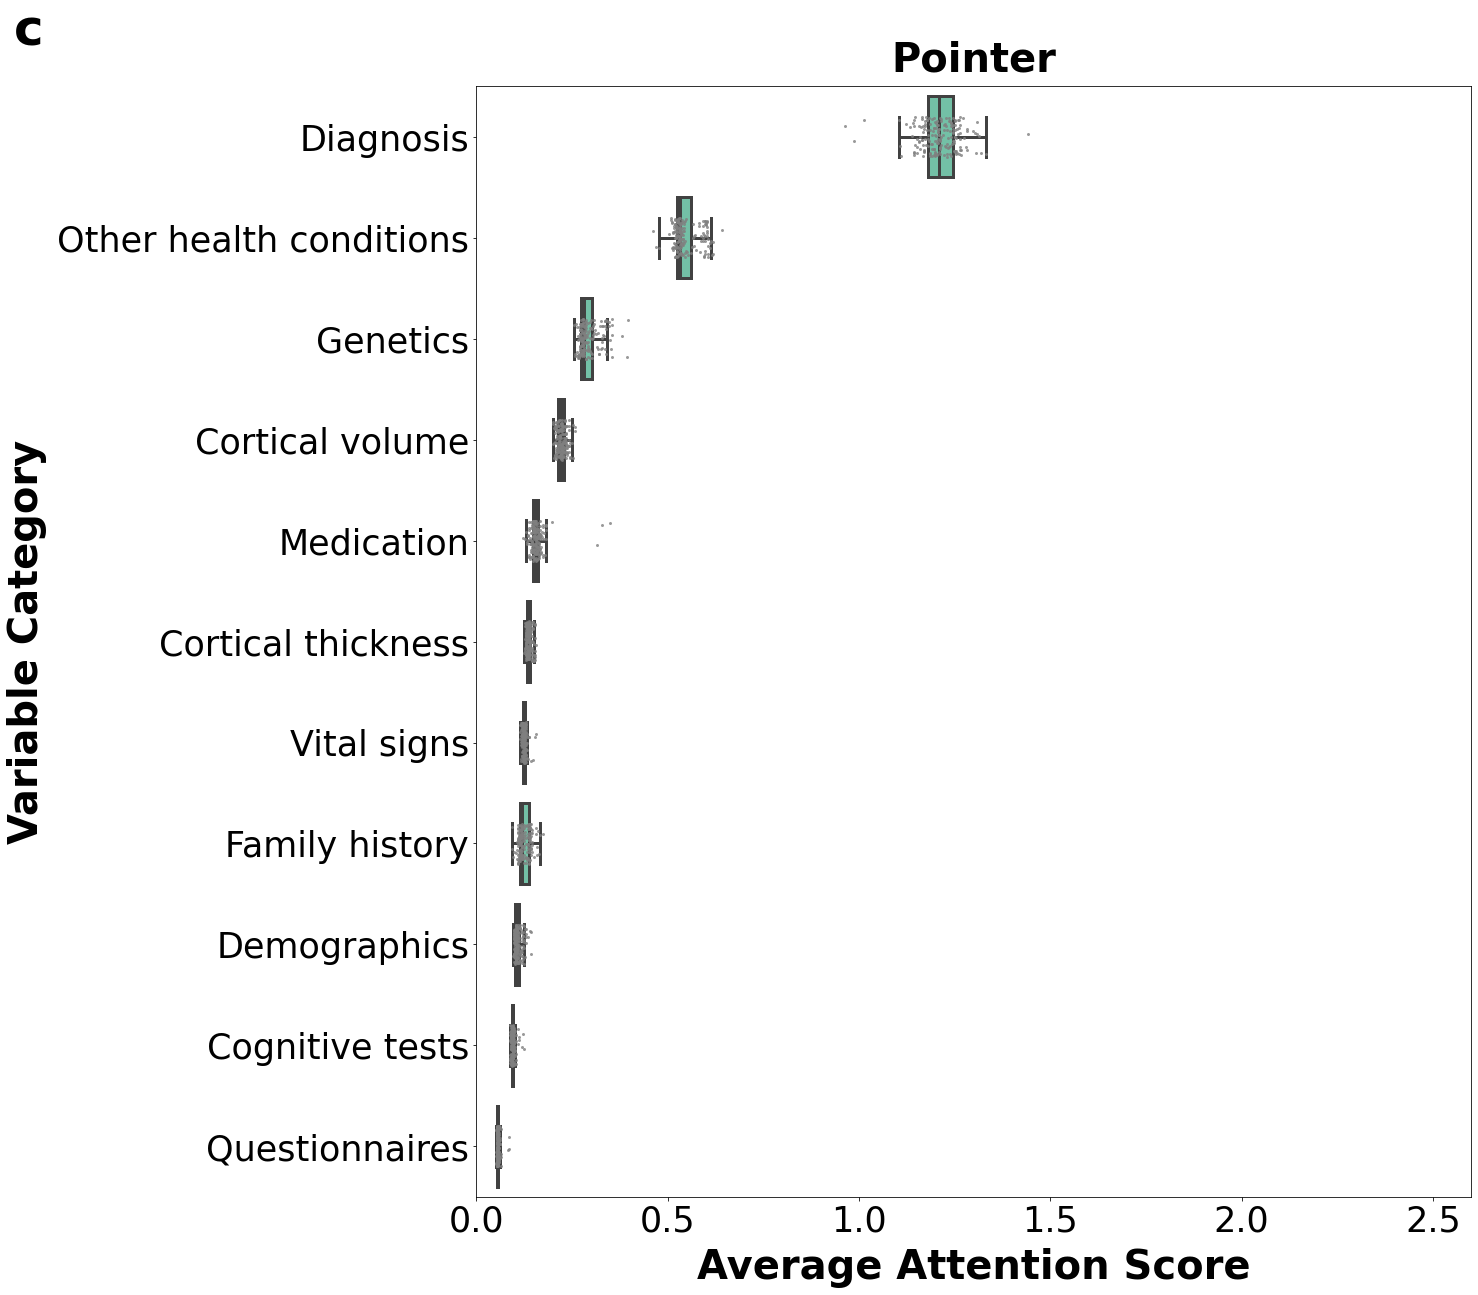

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
data_directory="D:\\Research\\AD\\ADLLM\\ADNI process 9\\AD_attention_Dec_27\\AD_attention_Dec_27\\POINTER\\"
# Load the data
data = pd.read_csv(data_directory + 'average_attention_scores_per_person.csv')

# Rename columns

data = data.rename(columns={col: col.capitalize() for col in data.columns})
data = data.rename(columns={
    'Vital': 'Vital signs',
  "Other health condition":"Other health conditions",
    "Volume":"Cortical volume",
    "Thickness":"Cortical thickness",
    "Demographic information":"Demographics",
    "Genetics":"Genetics",
    "Physical score":"Questionnaires",
    "Cognitive test":"Cognitive tests"
})
# Drop unnecessary columns
data = data.drop(columns=['Response', 'Visit_info',"Person_id","Ad blood biomarker","Ad csf biomarker","Fdg-pet","Habit"])

# Remove zero values
data_no_zeros = data.replace(0, np.nan)

# Calculate medians for each category, sort them, and reorder the data columns
medians = data_no_zeros.median().sort_values(ascending=False)
data_sorted = data_no_zeros[medians.index]

# Set the plot style and color scheme
#sns.set(style="whitegrid")
plt.figure(figsize=(22, 18))

# Define the green color
box_color = "#66CDAA"   # Approximated green color
point_color = "grey"  # Darker shade of green for points

# Create the box plot with a single color and sorted categories
ax = sns.boxplot(data=data_sorted, orient='h', color=box_color, fliersize=0, linewidth=3)

# Add points with a slightly darker green color, smaller size, and increased transparency
sns.stripplot(data=data_sorted, orient='h', color=point_color, size=3, jitter=0.2, alpha=0.8)

# Customize labels and title
plt.xlabel('Average Attention Score', fontsize=40, labelpad=10,fontweight='bold')
plt.ylabel('Variable Category', fontsize=40, labelpad=10,fontweight='bold')
plt.title('Pointer', fontsize=40, fontweight='bold', pad=15)
plt.text(-0.45, 1.05, 'c', transform=plt.gca().transAxes, fontsize=50, fontweight='bold', color="black", ha='center', va='center')
# Adjust tick label size for readability
plt.xticks(fontsize=35)
plt.yticks(fontsize=35)
plt.xlim(0, 2.6)
plt.tight_layout()
plt.savefig("D:\\Research\\AD\\ADLLM\\ADNI process 9\\Result_visualization\\attention_pointer.svg", format="svg")
plt.savefig("D:\\Research\\AD\\ADLLM\\ADNI process 9\\Result_visualization\\attention_pointer.png", format="png")
# Show the plot
plt.show()
